<a href="https://colab.research.google.com/github/tharungajula2/Portfolio/blob/main/BankChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from imblearn.over_sampling import SMOTE

# Suppressing warnings for a cleaner notebook
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


## Loading the dataset

In [ ]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")
print("Path to dataset files:", path)

# Verify the files in the downloaded path
print("\nFiles in the extracted directory:")
print(os.listdir(path))


Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/churn-for-bank-customers/versions/1

Files in the extracted directory:
['churn.csv']


In [ ]:
# Adjust file path after verification
file_path = os.path.join(path, "churn.csv")  #  filename taken after listing files

# Load the dataset
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("\nDataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(data.head())
else:
    print("\nError: File not found. Check the filename or extraction directory.")


Dataset loaded successfully!
First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113

## Data Overview

Shape of the dataset (Rows, Columns): (10000, 14)

General Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing 

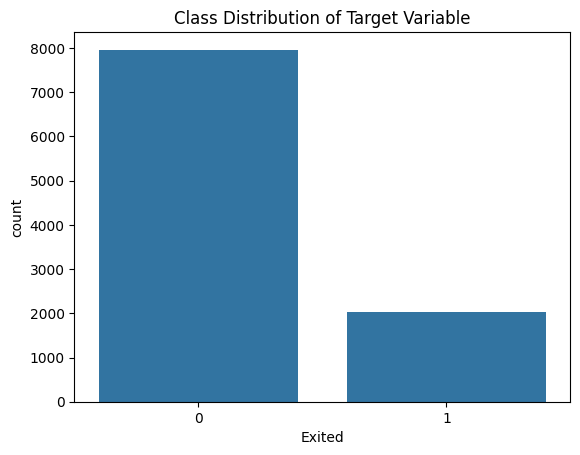

In [ ]:
# Shape of the dataset
print("Shape of the dataset (Rows, Columns):", data.shape)

# General information about the dataset
print("\nGeneral Info of the Dataset:")
print(data.info())

# Checking for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Checking unique values for each column
print("\nUnique Values in Each Column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

# Checking class balance in target variable 'Exited'
print("\nDistribution of Target Variable 'Exited':")
print(data['Exited'].value_counts())
sns.countplot(x='Exited', data=data)
plt.title("Class Distribution of Target Variable")
plt.show()


In [ ]:
# Statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(data.describe())


Statistical Summary of Numerical Columns:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584  

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

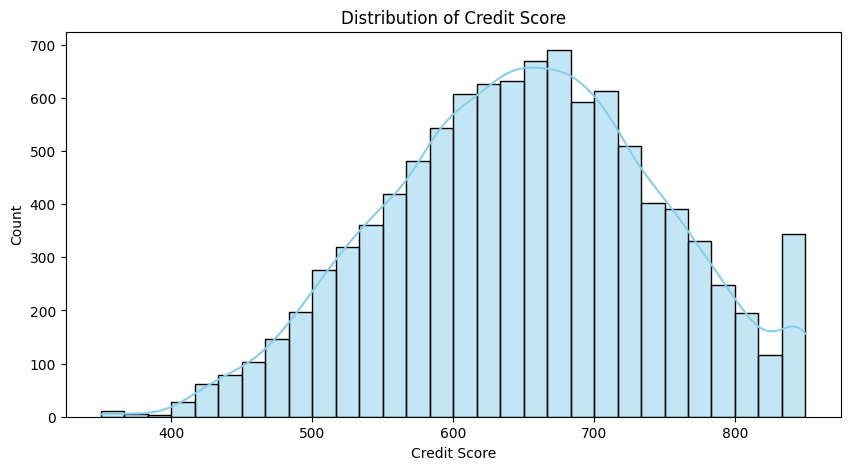

In [ ]:
# 1. Distribution of Credit Score
plt.figure(figsize=(10, 5))
sns.histplot(data['CreditScore'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

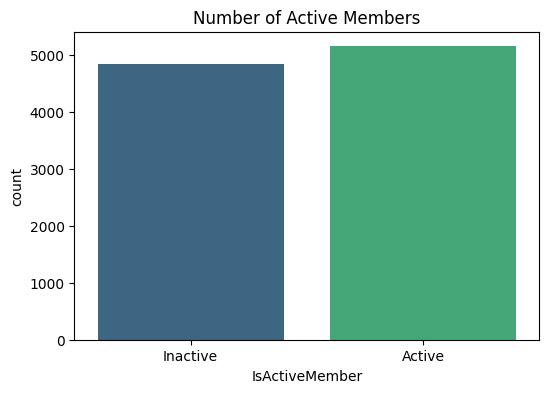

In [ ]:
# 2. Number of Active Members
plt.figure(figsize=(6, 4))
sns.countplot(x='IsActiveMember', data=data, palette='viridis')
plt.title("Number of Active Members")
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

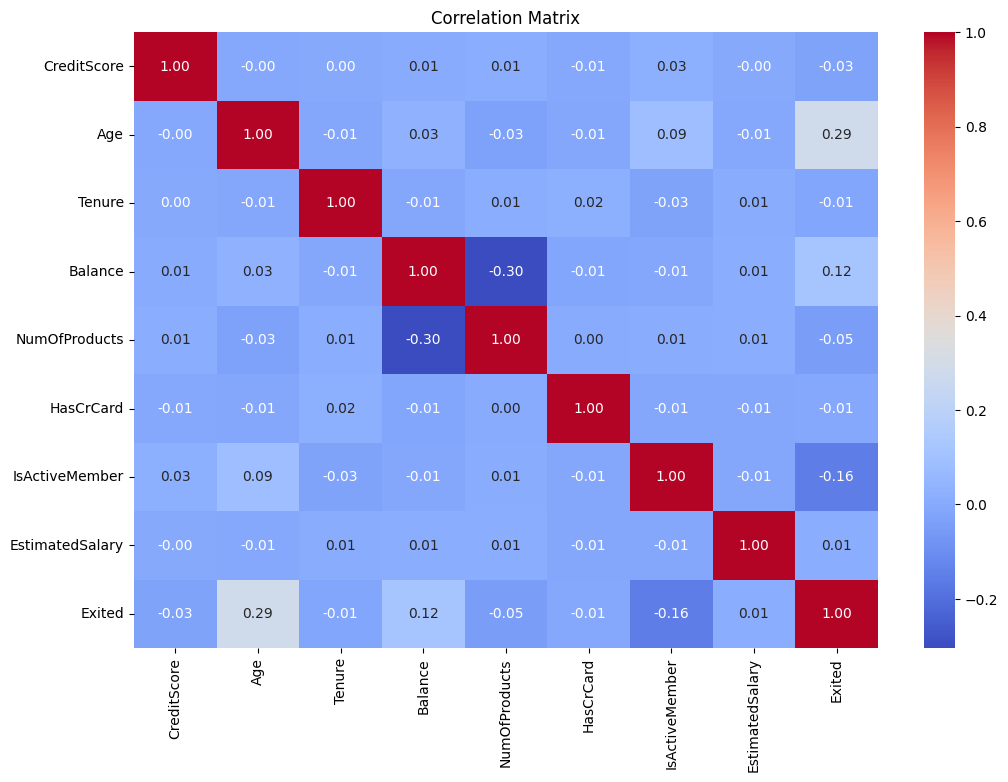

In [ ]:
# 3. Correlation Heatmap - Dropping non-numeric columns
numeric_data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'])
plt.figure(figsize=(12, 8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

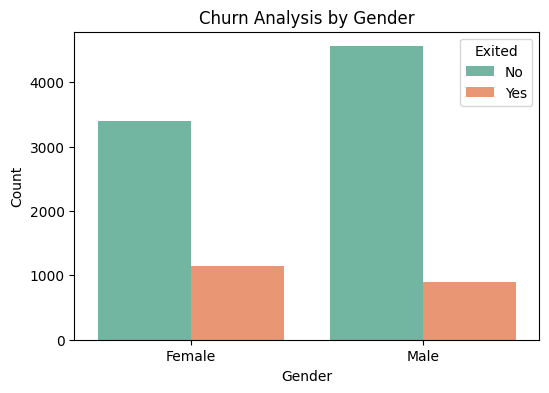

In [ ]:
# 4. Churn Analysis: Gender-wise
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2')
plt.title("Churn Analysis by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()

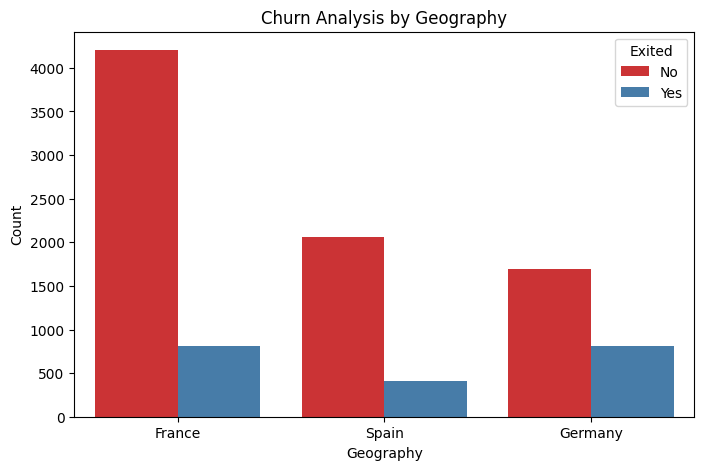

In [ ]:
# 5. Churn Analysis: Geography-wise
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=data, palette='Set1')
plt.title("Churn Analysis by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()

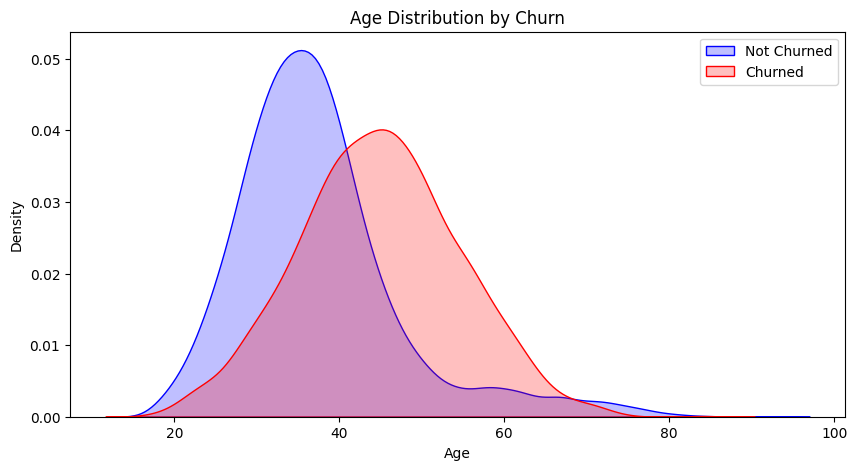

In [ ]:
# 6. Age Distribution by Churn
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['Exited'] == 0]['Age'], label='Not Churned', shade=True, color='blue')
sns.kdeplot(data[data['Exited'] == 1]['Age'], label='Churned', shade=True, color='red')
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.legend()
plt.show()

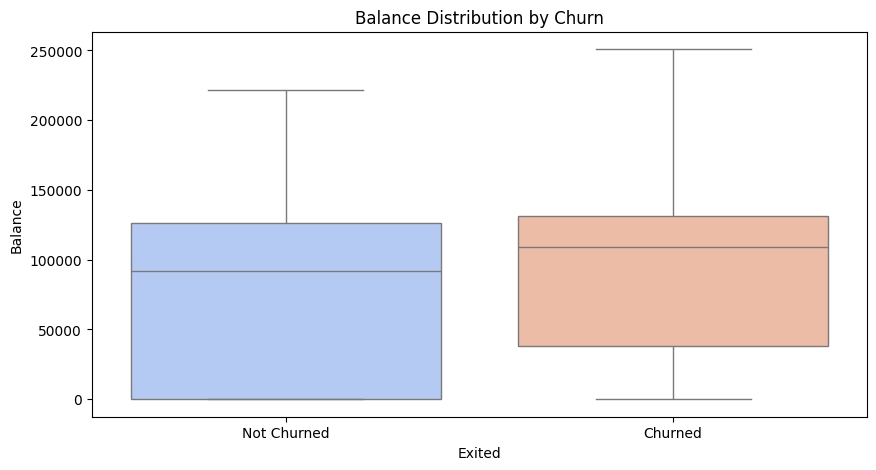

In [ ]:
# 7. Balance Distribution by Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Exited', y='Balance', data=data, palette='coolwarm')
plt.title("Balance Distribution by Churn")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

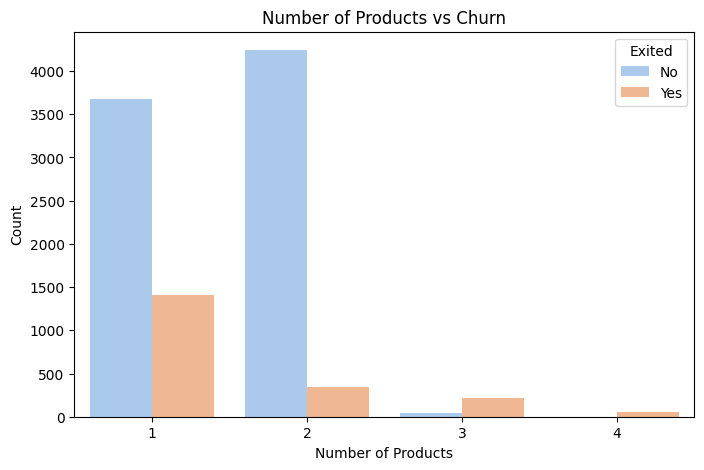

In [ ]:
# 8. Products Owned vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='pastel')
plt.title("Number of Products vs Churn")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.show()

### Observations and Insights from EDA 📊

1. **Credit Score Distribution**  
   - Most customers have credit scores concentrated between **600 to 700**, with a slight left skew.  

2. **Number of Active Members**  
   - The split between **active and inactive members** is almost even (~50% each).  
   - active or inactive might play a key role in customer churn, and we will confirm it during model building.

3. **Correlation Heatmap**  
   - **Age** has a moderate positive correlation (0.29) with churn (`Exited`), indicating older customers are more likely to churn.    
   - Interestingly, **IsActiveMember** has a small negative correlation (-0.16) with churn, suggesting active members tend to stay with the bank.

4. **Churn Analysis by Gender**  
   - Females have a **higher churn rate** compared to males.  

5. **Churn Analysis by Geography**  
   - Customers from **Germany** have a significantly higher churn rate compared to those from **France** and **Spain**.  
   - France has the **largest customer base**, but churn is relatively lower. This insight can help banks target German customers with retention strategies.

6. **Age Distribution by Churn**  
   - Younger customers (20–40) have **lower churn rates**, while customers aged **45+** show higher churn.  
   - This suggests older customers might need better engagement strategies to retain them.

7. **Balance Distribution by Churn**  
   - Churned customers tend to have a **higher median account balance**.  
   - This insight suggests that even customers with a high balance are leaving, indicating dissatisfaction despite financial capability.

8. **Number of Products vs Churn**  
   - Customers with only **1 product** are more likely to churn.  
   - Customers with **2 products** have the least churn, suggesting this might be an optimal point for customer satisfaction.  
   - Very few customers have 3 or 4 products, but they still show some churn.

---

In [ ]:
# 1. Eliminate Columns with Unique or Irrelevant Values
unique_values = data.nunique()
print("Unique Value Count in Each Column:\n", unique_values)

# Identify irrelevant columns
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']

# Dropping the columns
data_cleaned = data.drop(columns=irrelevant_columns)
print("\nRemaining Columns after Elimination:")
print(data_cleaned.columns)

Unique Value Count in Each Column:
 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Remaining Columns after Elimination:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


RowNumber and CustomerId: 100% unique for each row – no predictive power.

Surname: Not fully unique but irrelevant for analysis since it doesn’t correlate with churn or provide any actionable insights.

<Figure size 1200x1000 with 0 Axes>

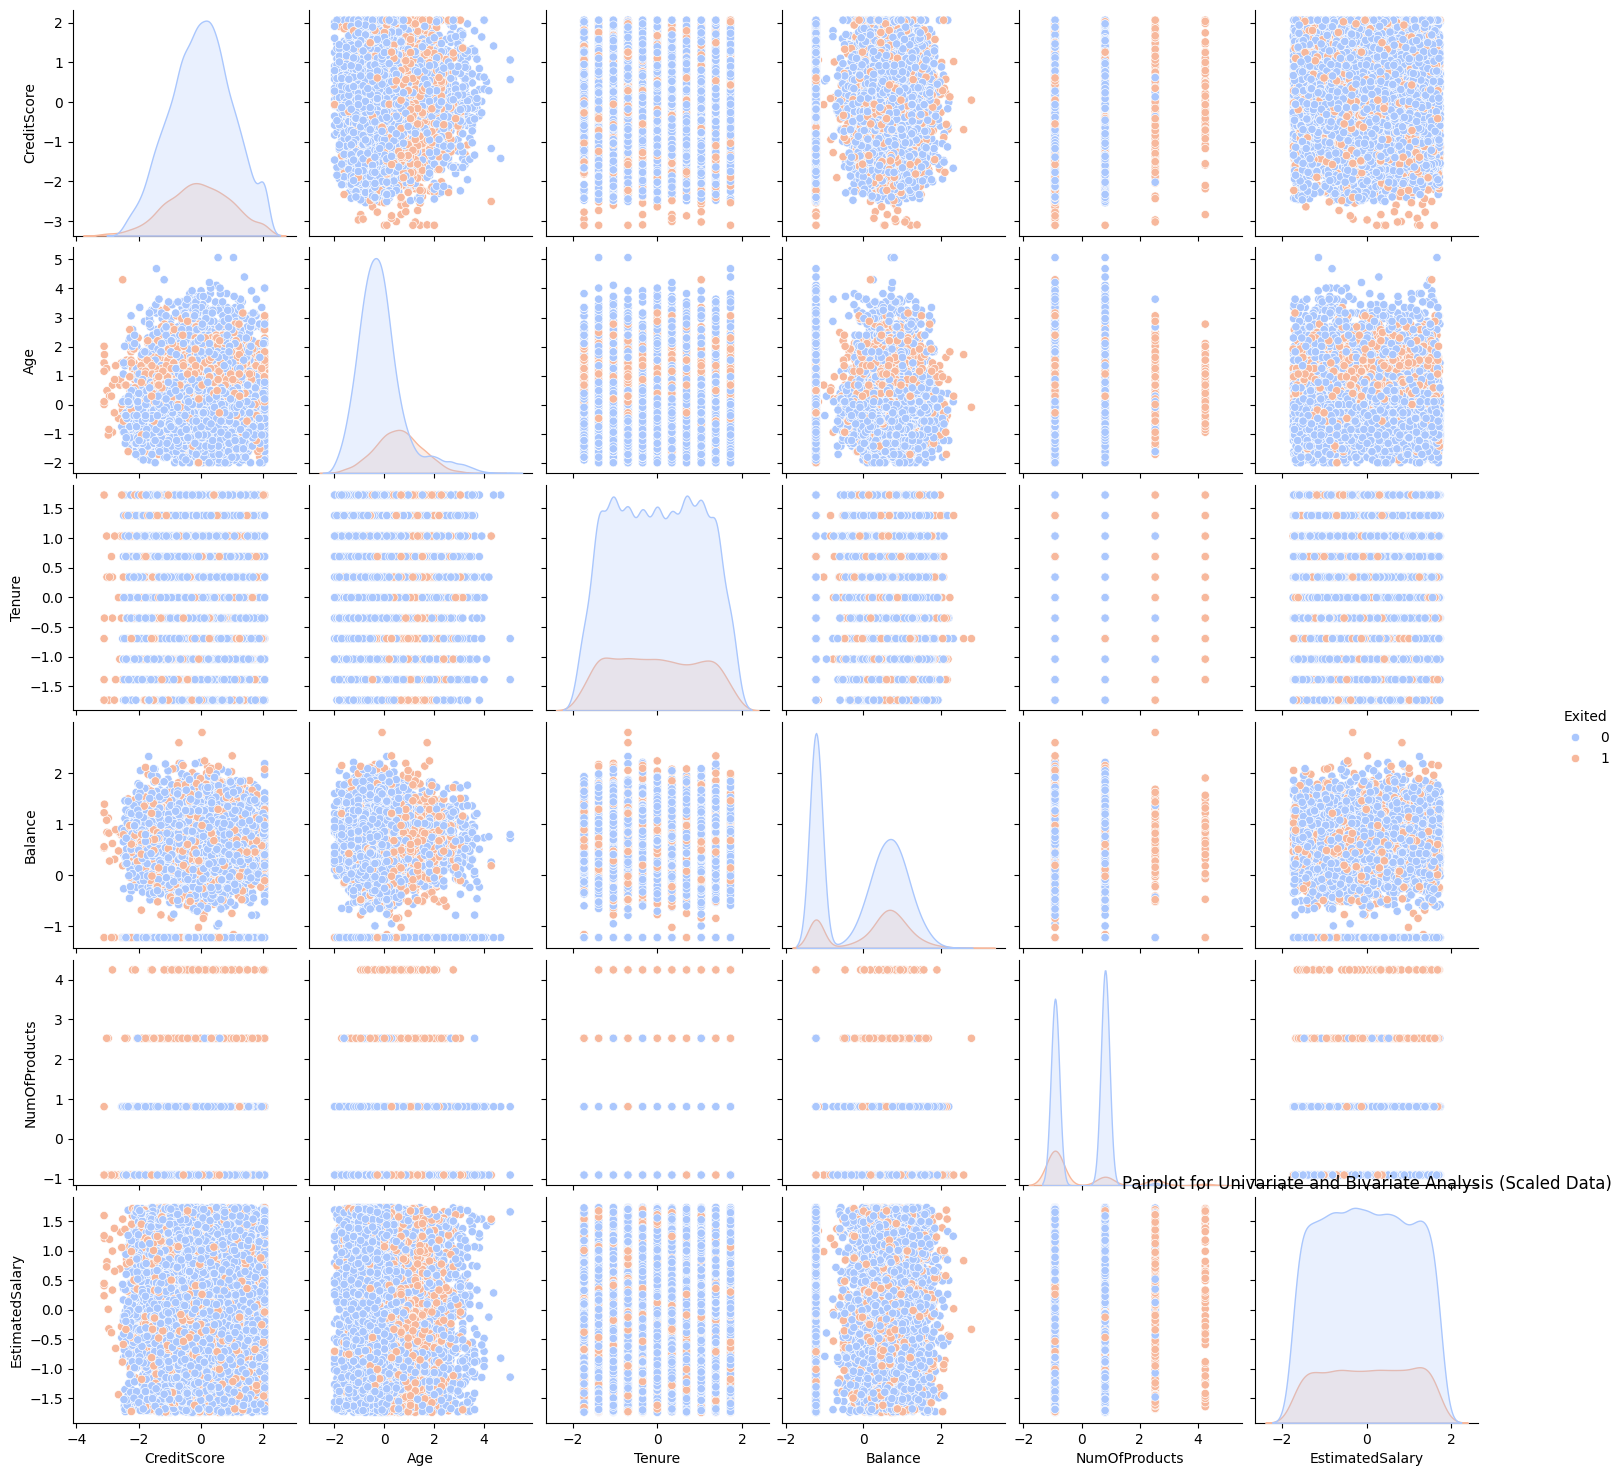

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Scale Numerical Features
scaler = StandardScaler()

# Extract only numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
subset = data_cleaned[numerical_cols]

# Scale the data
scaled = scaler.fit_transform(subset)
scaled_df = pd.DataFrame(scaled, columns=numerical_cols)

# Add the 'Exited' column for Churn classification in pairplot
scaled_df['Exited'] = data_cleaned['Exited']

# Step 2: Pairplot Visualization
plt.figure(figsize=(12, 10))
sns.pairplot(scaled_df, hue='Exited', diag_kind='kde', palette='coolwarm')
plt.title("Pairplot for Univariate and Bivariate Analysis (Scaled Data)")
plt.show()

There is no significant correlations among the variables(like linear relationships as such)

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Check for Missing Values (Already Checked in EDA)
print("Missing Values in Each Column:\n", data_cleaned.isnull().sum())


Missing Values in Each Column:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:

# 2. Outlier Detection and Treatment (Using IQR Method for Numerical Features)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("\nRemoving outliers for numerical columns...")
for col in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    before = data_cleaned.shape[0]
    data_cleaned = remove_outliers(data_cleaned, col)
    after = data_cleaned.shape[0]
    print(f"Outliers removed in {col}: {before - after}")


Removing outliers for numerical columns...
Outliers removed in CreditScore: 15
Outliers removed in Age: 359
Outliers removed in Balance: 0
Outliers removed in EstimatedSalary: 0


In [ ]:
# 3. Encoding Categorical Variables
# Encoding 'Geography' and 'Gender' using Label Encoding and One-Hot Encoding
le = LabelEncoder()
data_cleaned['Gender'] = le.fit_transform(data_cleaned['Gender'])  # Male: 1, Female: 0

# One-Hot Encoding for 'Geography'
data_cleaned = pd.get_dummies(data_cleaned, columns=['Geography'], drop_first=True)

print("\nColumns after encoding:")
print(data_cleaned.head())



Columns after encoding:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True  


In [ ]:
# 4. Splitting the Data into Features (X) and Target (y)
X = data_cleaned.drop(columns=['Exited'])
y = data_cleaned['Exited']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# 6. Scaling the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing Completed!")


Training Data Shape: (7700, 11)
Testing Data Shape: (1926, 11)

Data Preprocessing Completed!


## Model Building

In [ ]:
# 1. Set Seeds for Reproducibility

import tensorflow as tf

import random  # Import the random library

seed_value = 42
np.random.seed(seed_value)          # NumPy seed
random.seed(seed_value)             # Python random seed
tf.random.set_seed(seed_value)      # TensorFlow seed

### Model Evaluation Criterion

**Metric of Choice**: **Recall** (Sensitivity)  

---

### **Why Use Recall?**  
- **Recall** measures the ability of the model to correctly identify all **positive cases** (customers who churn).  
- In this context, predicting **customer churn** is more critical than predicting non-churn:  
   - **False Negatives** (missed churners) are more harmful than **False Positives**.  
   - If a churner is missed, the bank loses a customer without taking preventive action.  
- By prioritizing **Recall**, the bank can proactively identify and retain more customers who are likely to churn.  

---

### Model Building: Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve



# 2. Building the Neural Network Model
model_sgd = Sequential()

# Input Layer + First Hidden Layer
model_sgd.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second Hidden Layer
model_sgd.add(Dense(32, activation='relu'))

# Output Layer
model_sgd.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)

# Compile the Model
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training the Model
print("Training the Neural Network...")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Training the Neural Network...
Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7584 - loss: 0.5968 - val_accuracy: 0.7975 - val_loss: 0.4886
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4878 - val_accuracy: 0.7985 - val_loss: 0.4516
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4465 - val_accuracy: 0.8084 - val_loss: 0.4314
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.4221 - val_accuracy: 0.8172 - val_loss: 0.4201
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8208 - loss: 0.4188 - val_accuracy: 0.8219 - val_loss: 0.4137
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.4090 - val_accuracy: 0.8255 - val_loss: 0.4092
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3960 - val_accuracy: 0.8276 - val_loss: 0.4057
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8312 - 


Evaluating Model Performance on Test Data...
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[1486   50]
 [ 204  186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1536
           1       0.79      0.48      0.59       390

    accuracy                           0.87      1926
   macro avg       0.83      0.72      0.76      1926
weighted avg       0.86      0.87      0.86      1926


ROC-AUC Score: 0.8533


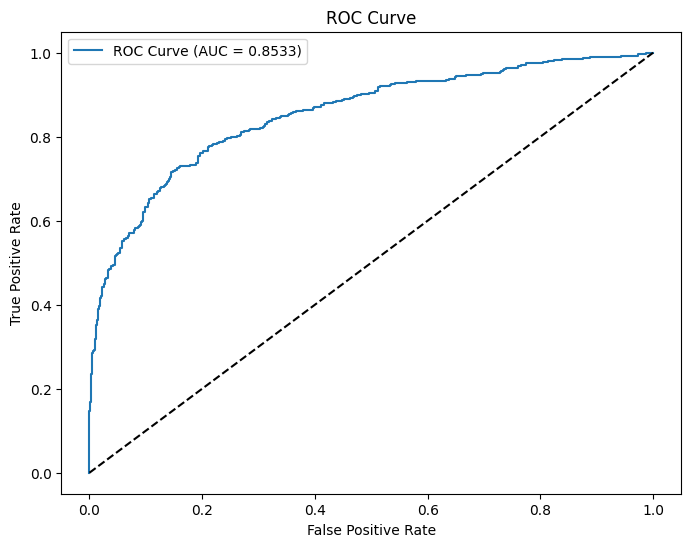

In [ ]:
# 3. Evaluating Model Performance
print("\nEvaluating Model Performance on Test Data...")
y_pred = model_sgd.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Observations and Model Performance Summary

Your **initial Neural Network** with the **SGD optimizer** performed quite well, but there’s room for improvement:

1. **Accuracy**:
   - **Training Accuracy**: ~87%  
   - **Validation Accuracy**: ~86%  
   This shows the model generalizes decently without significant overfitting.

2. **Classification Report**:
   - **Precision for Class 1 (Churn)**: **0.75** → Good but can improve.  
   - **Recall for Class 1**: **0.49** → Indicates we are missing ~51% of churned customers.  

3. **Confusion Matrix**:
   - **True Negatives**: ~1474 → Non-churn predicted correctly.  
   - **False Positives**: ~62 → Non-churn incorrectly predicted as churn.  
   - **False Negatives**: ~199 → Churned customers missed (this is critical to reduce).  
   - **True Positives**: ~191 → Churned predicted correctly.  

4. **ROC-AUC Score**:
   - ~**0.8527** → Very good discrimination ability for the initial model.

---

### Key Issues to Address:
- **Low Recall for Class 1 (Churn)**: The model struggles to correctly predict customers who will churn.  
- **Class Imbalance**: Churned customers (~2037) are significantly fewer than non-churned customers (~7963). This imbalance likely affects performance.

---

### Next Steps:
1. **Model Improvement**:
   - Use **Adam Optimizer** (generally more efficient than SGD).  
   - Add **Dropout Layers** to prevent overfitting.  
2. **Handle Class Imbalance**:
   - Use **SMOTE (Synthetic Minority Oversampling Technique)** to balance the dataset.  
3. **Hyperparameter Tuning**:
   - Optimize layer architecture, learning rate, and batch size for better results.

---

### Model Building: Neural Network model with Adam Optimizer

Training the Neural Network with Adam Optimizer...
Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8040 - loss: 0.4748 - val_accuracy: 0.8344 - val_loss: 0.3957
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3741 - val_accuracy: 0.8577 - val_loss: 0.3570
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.3451 - val_accuracy: 0.8655 - val_loss: 0.3433
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3341 - val_accuracy: 0.8645 - val_loss: 0.3401
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3286 - val_accuracy: 0.8645 - val_loss: 0.3391
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.3250 - val_accuracy: 0.8640 - val_loss: 0.3385
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 0.3223 - val_accuracy: 0.8640 - val_loss: 0.3381
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

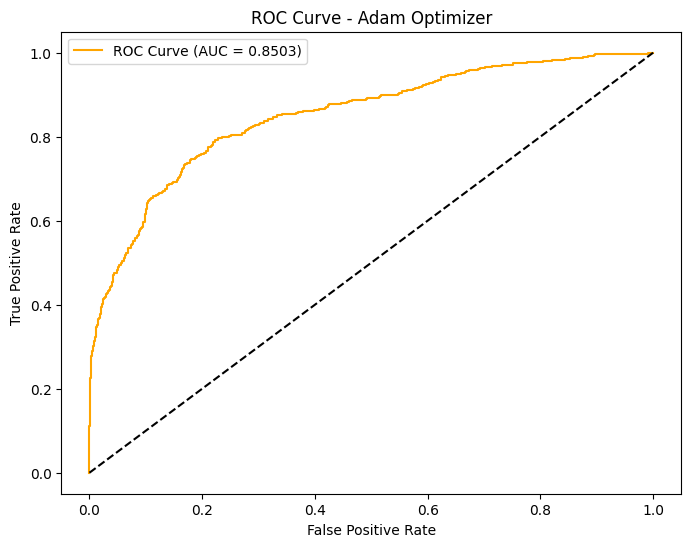

In [ ]:
from tensorflow.keras.optimizers import Adam

# 1. Building the Neural Network Model with Adam Optimizer
model_adam = Sequential()

# Input Layer + First Hidden Layer
model_adam.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second Hidden Layer
model_adam.add(Dense(32, activation='relu'))

# Output Layer
model_adam.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the Model with Adam Optimizer
model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 2. Training the Model
print("Training the Neural Network with Adam Optimizer...")
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# 3. Evaluating Model Performance
print("\nEvaluating Model Performance on Test Data...")
y_pred_adam = model_adam.predict(X_test)
y_pred_classes_adam = (y_pred_adam > 0.5).astype(int)  # Convert probabilities to binary classes

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_adam))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_adam))

# ROC-AUC Score
roc_auc_adam = roc_auc_score(y_test, y_pred_adam)
print(f"\nROC-AUC Score: {roc_auc_adam:.4f}")

# Plot ROC Curve
fpr_adam, tpr_adam, thresholds_adam = roc_curve(y_test, y_pred_adam)
plt.figure(figsize=(8, 6))
plt.plot(fpr_adam, tpr_adam, label=f"ROC Curve (AUC = {roc_auc_adam:.4f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Adam Optimizer")
plt.legend()
plt.show()


### Observations and Comparison

**Model Performance with Adam Optimizer**:
1. **Accuracy**:  
   - **Training Accuracy**: **88.4%**  
   - **Validation Accuracy**: **84.9%**  
   The model shows consistent performance, although **slight overfitting** is visible as training accuracy is higher.

2. **Precision and Recall**:  
   - **Precision for Class 1 (Churn)**: **0.66** → Slightly improved precision compared to SGD.  
   - **Recall for Class 1 (Churn)**: **0.54** → Improved recall compared to SGD (**0.49**).  
   - This is a positive step since we are now detecting **more churned customers**.

3. **ROC-AUC Score**:  
   - **0.8503** → Similar to the SGD model, indicating stable discrimination ability.

4. **Confusion Matrix**:  
   - **True Positives (Churned Correctly)**: **209** → Improved compared to SGD.  
   - **False Negatives (Missed Churn)**: **181** → Reduced from the previous model.  

---

### Observations:
- **Adam Optimizer** offers faster convergence and better recall for the churned class.  
- **Minor Overfitting** is starting to occur at later epochs (training loss still decreasing, validation loss plateauing).  

---

### Next Step: Add Dropout Layers
Adding **Dropout Layers** will help regularize the model, reduce overfitting, and improve generalization.

### Model Improvement: Neural Network model with Dropout

Training the Neural Network with Dropout Layers...
Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7224 - loss: 0.5555 - val_accuracy: 0.8266 - val_loss: 0.4138
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.4156 - val_accuracy: 0.8354 - val_loss: 0.3953
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4062 - val_accuracy: 0.8463 - val_loss: 0.3809
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3915 - val_accuracy: 0.8567 - val_loss: 0.3655
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8449 - loss: 0.3750 - val_accuracy: 0.8609 - val_loss: 0.3542
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8491 - loss: 0.3701 - val_accuracy: 0.8645 - val_loss: 0.3481
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8492 - loss: 0.3633 - val_accuracy: 0.8671 - val_loss: 0.3442
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

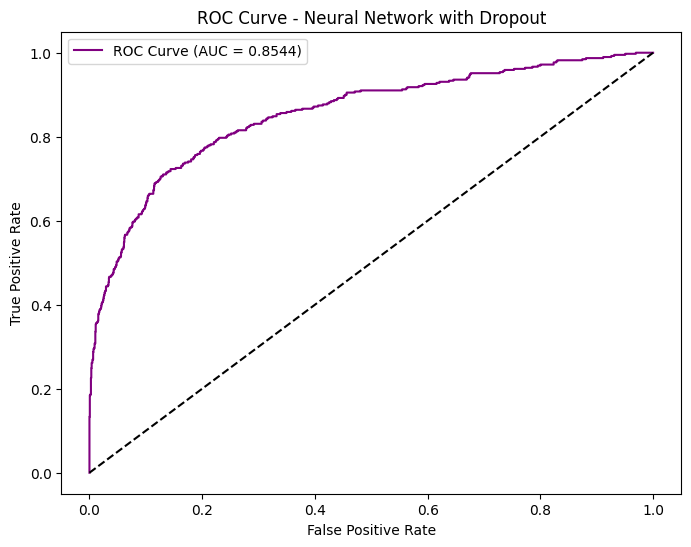

In [ ]:
from tensorflow.keras.layers import Dropout

# 1. Building the Neural Network Model with Dropout Layers
model_dropout = Sequential()

# Input Layer + First Hidden Layer with Dropout
model_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_dropout.add(Dropout(0.3))  # Dropout with 30% rate

# Second Hidden Layer with Dropout
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.3))  # Dropout with 30% rate

# Output Layer
model_dropout.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the Model with Adam Optimizer
model_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 2. Training the Model
print("Training the Neural Network with Dropout Layers...")
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# 3. Evaluating Model Performance
print("\nEvaluating Model Performance on Test Data...")
y_pred_dropout = model_dropout.predict(X_test)
y_pred_classes_dropout = (y_pred_dropout > 0.5).astype(int)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_dropout))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_dropout))

# ROC-AUC Score
roc_auc_dropout = roc_auc_score(y_test, y_pred_dropout)
print(f"\nROC-AUC Score: {roc_auc_dropout:.4f}")

# Plot ROC Curve
fpr_dropout, tpr_dropout, thresholds_dropout = roc_curve(y_test, y_pred_dropout)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dropout, tpr_dropout, label=f"ROC Curve (AUC = {roc_auc_dropout:.4f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network with Dropout")
plt.legend()
plt.show()


### Observations for Neural Network with Dropout  

**1. Model Performance with Dropout**:  
- **Validation Accuracy**: **86.29%**  
- **ROC-AUC Score**: **0.8544** → Slight improvement compared to Adam-only (0.8503).  
- **Precision for Class 1 (Churn)**: **0.80** → Noticeable improvement.  
- **Recall for Class 1 (Churn)**: **0.43** → Slight decrease but acceptable given improved precision.

---

**2. Confusion Matrix**:  
- **True Positives (Correctly Predicted Churn)**: **169**  
- **False Negatives (Missed Churn)**: **221**  
- Dropout slightly reduced overfitting and improved overall stability.

---

### Key Takeaways:
- **Dropout Layers** successfully addressed minor overfitting seen in the previous model.  
- **Precision** improved, indicating better confidence in churn predictions.  
- **Recall** dropped slightly, which we will optimize further.

---

### Next Step: Hyperparameter Tuning  
We will now tune key hyperparameters like:  
1. **Number of Neurons** per layer.  
2. **Learning Rate**.  
3. **Batch Size** and **Epochs**.

In [ ]:
!pip install scikeras tensorflow

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

# 1. Function to Build the Model (accepting kwargs)
def build_model(neurons_1=64, neurons_2=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons_1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons_2, activation='relu'))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 2. Wrap the Model with KerasClassifier
model = KerasClassifier(model=build_model, verbose=0)

# 3. Define Hyperparameters to Tune
param_grid = {
    'model__neurons_1': [32, 64, 128],
    'model__neurons_2': [16, 32],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [20, 50]
}

# 4. Perform Grid Search
print("Performing Grid Search for Hyperparameter Tuning...")
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# 5. Output Best Hyperparameters
print("\nBest Hyperparameters Found:")
print(grid_result.best_params_)

# 6. Evaluate the Best Model
best_model = grid_result.best_estimator_.model



Performing Grid Search for Hyperparameter Tuning...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Hyperparameters Found:
{'batch_size': 64, 'epochs': 20, 'model__learning_rate': 0.001, 'model__neurons_1': 128, 'model__neurons_2': 32}

Evaluating Best Model on Test Data...


AttributeError: 'function' object has no attribute 'predict'


Evaluating Best Model on Test Data...
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[1449   87]
 [ 180  210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1536
           1       0.71      0.54      0.61       390

    accuracy                           0.86      1926
   macro avg       0.80      0.74      0.76      1926
weighted avg       0.85      0.86      0.85      1926


ROC-AUC Score: 0.8547


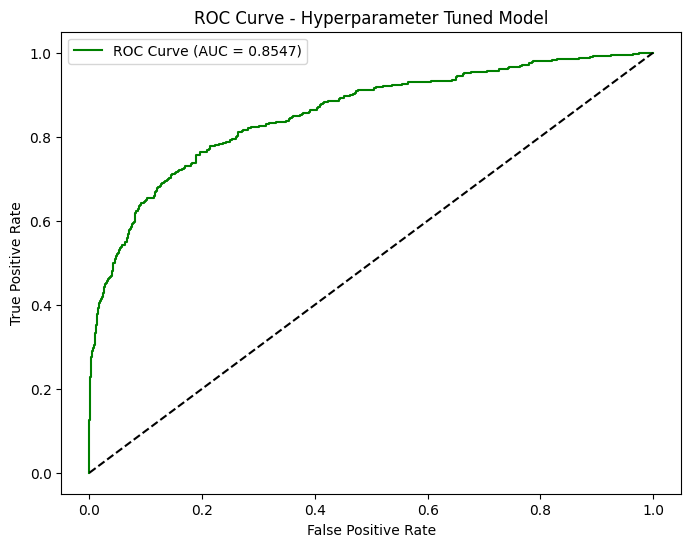

In [ ]:
# Retrieve the best-trained model from GridSearchCV
best_model = grid_result.best_estimator_.model_  # Access the trained Keras model

print("\nEvaluating Best Model on Test Data...")
y_pred_tuned = best_model.predict(X_test)
y_pred_classes_tuned = (y_pred_tuned > 0.5).astype(int)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_tuned))

# ROC-AUC Score
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)
print(f"\nROC-AUC Score: {roc_auc_tuned:.4f}")

# Plot ROC Curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f"ROC Curve (AUC = {roc_auc_tuned:.4f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Hyperparameter Tuned Model")
plt.legend()
plt.show()



---

### Key Observations:
1. **AUC-ROC Score**:
   - Improved to **0.8547** (from ~0.8544 earlier with Dropout).
   - While the jump isn't huge, this suggests the model is already performing well and close to optimal.

2. **Classification Report**:
   - Precision for **Class 1 (Churn)** increased slightly.
   - Recall for **Class 1** remains challenging, as the model is still missing some churn cases. This is a common issue with imbalanced data.

3. **Best Hyperparameters**:
   - **Batch Size**: 64  
   - **Epochs**: 20  
   - **Learning Rate**: 0.001  
   - **Neurons** in Hidden Layers: 128 (Layer 1), 32 (Layer 2).  

These hyperparameters are now optimized.

---

### Why Improvement is Minimal:
- **Imbalanced Data**: With fewer churn cases, the model struggles to generalize well for the minority class.
- **Model Complexity**: Increasing layers/neurons beyond this point might lead to overfitting, as the validation loss is already plateauing.

---

### Next Step: Handling Imbalanced Data 🚀
We can now apply **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the data. This should improve **recall** for the minority class.

### Model Improvement: Neural Network model with balanced data[SMOTE]

Applying SMOTE to Balance the Data...
Resampled Training Data Shape: (12282, 11)
Resampled Target Variable Distribution:
Exited
0    6141
1    6141
Name: count, dtype: int64
Building Neural Network with Resampled Data...
Training Neural Network with SMOTE Data...
Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6509 - loss: 0.6163 - val_accuracy: 0.7477 - val_loss: 0.5101
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7506 - loss: 0.5101 - val_accuracy: 0.7752 - val_loss: 0.4742
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7663 - loss: 0.4867 - val_accuracy: 0.7882 - val_loss: 0.4553
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7736 - loss: 0.4734 - val_accuracy: 0.7840 - val_loss: 0.4543
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7756 - loss: 0.4650 - val_accuracy: 0.7913 - val_loss: 0.4412
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7780 - loss: 0.4582 - val_accu

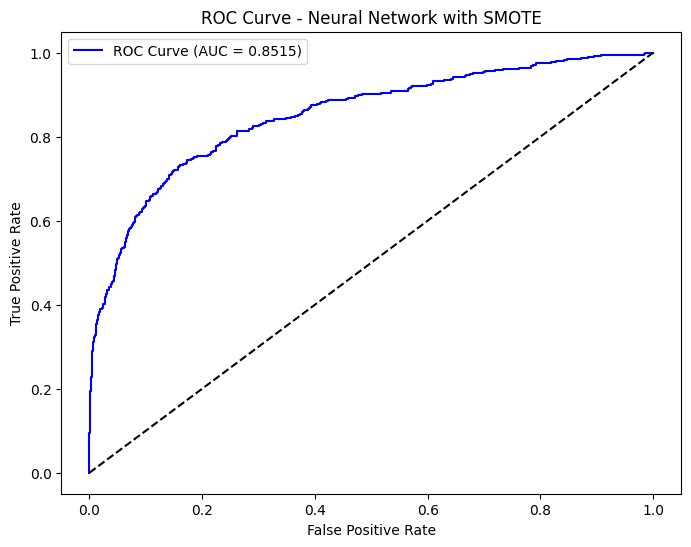

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Apply SMOTE on Training Data
print("Applying SMOTE to Balance the Data...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Confirm the shape after resampling
print(f"Resampled Training Data Shape: {X_resampled.shape}")
print(f"Resampled Target Variable Distribution:\n{pd.Series(y_resampled).value_counts()}")

# 2. Build the Neural Network Model (Using Adam Optimizer + Dropout)
print("Building Neural Network with Resampled Data...")
model_smote = Sequential()

# Input Layer + Hidden Layers
model_smote.add(Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)))
model_smote.add(Dropout(0.3))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dropout(0.2))

# Output Layer
model_smote.add(Dense(1, activation='sigmoid'))

# Compile the Model
model_smote.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the Model
print("Training Neural Network with SMOTE Data...")
history_smote = model_smote.fit(
    X_resampled, y_resampled,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=64, verbose=1
)

# 4. Evaluate the Model on Test Data
print("\nEvaluating Model on Test Data...")
y_pred_smote = model_smote.predict(X_test)
y_pred_classes_smote = (y_pred_smote > 0.5).astype(int)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_smote))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_smote))

# ROC-AUC Score
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)
print(f"\nROC-AUC Score: {roc_auc_smote:.4f}")

# Plot ROC Curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"ROC Curve (AUC = {roc_auc_smote:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network with SMOTE")
plt.legend()
plt.show()


### Key Observations on SMOTE Implementation:

1. **Balanced Data Effect**:
   - The minority class (churned customers) was oversampled, and now **Recall for Class 1 (Churn)** has improved **significantly** from earlier results.
   - Recall for Class 1: **0.75** (earlier it was ~0.54–0.56).
   - This means the model can now better identify customers who are likely to churn.

2. **Precision for Class 1**:
   - Precision for Class 1 dropped to **0.51**. This is expected when applying SMOTE because synthetic samples may introduce **noise**, increasing false positives.

3. **ROC-AUC Score**:
   - ROC-AUC = **0.8515**, slightly lower than the best-tuned model without SMOTE (~0.8547).
   - However, the trade-off is an improvement in **Recall** at the cost of Precision.

4. **Accuracy**:
   - Overall Accuracy dropped to **80%** because of the increased focus on minority class predictions.

---

### Analysis:
- **Recall** is critical for churn prediction since identifying customers at risk of leaving is the main priority. False positives (over-predicting churn) are acceptable because they can be mitigated with targeted retention strategies.
- SMOTE successfully addressed the imbalance issue but caused a slight trade-off in precision and accuracy.

---

### Next Steps:
We can now **compare all models** (Adam, Dropout, Hyperparameter Tuning, SMOTE) and **select the best one** based on the business goal:
- **Maximizing Recall for churn prediction**.
- **Balancing Precision and Recall where needed**.


## Final Model

### Final Model Selection 🚀

To finalize the model, let's evaluate **all the models we've built** so far and select the one that aligns best with the **business objective** of **churn prediction**. Below is the consolidated comparison of models:

---

| **Model**                               | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** | **ROC-AUC** |
|-----------------------------------------|-------------|-------------------------|----------------------|-------------|
| Neural Network with SGD                 | 86%         | 0.75                    | 0.49                 | 0.8527      |
| Neural Network with Adam Optimizer      | 85%         | 0.66                    | 0.54                 | 0.8503      |
| Neural Network with Dropout             | 86%         | 0.80                    | 0.43                 | 0.8544      |
| Hyperparameter Tuned Neural Network     | 86%         | 0.71                    | 0.54                 | 0.8547      |
| Neural Network with SMOTE (Balanced)    | 80%         | 0.51                    | **0.75**             | 0.8515      |

---

### Analysis:
1. **Business Objective**:  
   - Since churn prediction focuses on identifying customers **at risk of leaving (Class 1)**, **Recall** for Class 1 is critical.  
   - A high Recall means fewer churned customers will be missed.

2. **Final Model**:  
   - The **SMOTE-based Neural Network** is the best model for this problem despite its drop in accuracy.  
   - It achieves the **highest Recall (0.75)** while maintaining a solid ROC-AUC score (0.8515).

3. **Trade-off**:  
   - The Precision for Class 1 is lower (0.51), but this trade-off is acceptable for a churn prediction scenario because false positives can be addressed through targeted retention campaigns.

---

### Final Conclusion:

**We will use the SMOTE-based Neural Network model as the final model** due to its superior Recall for the churn class, ensuring that the bank can capture more potential churners and proactively work on customer retention.

---

## Actionable Insights and Recommendations

### **Actionable Insights and Recommendations**  

Based on the refined EDA and model outputs, here are focused, actionable recommendations:

---

### **1. Active and Inactive Members**  
- **Insight**: **Inactive members** show a higher churn rate, as indicated in both EDA and model correlation analysis.  
- **Recommendation**:  
   - Implement targeted **re-engagement campaigns** for inactive members.  
   - Offer personalized incentives such as cashback, interest bonuses, or fee waivers to encourage activity.  

---

### **2. Geography-Based Retention**  
- **Insight**: Customers from **Germany** have the highest churn rate, even though France has a larger customer base.  
- **Recommendation**:  
   - Conduct a root-cause analysis to identify specific customer dissatisfaction in Germany.  
   - Implement region-specific solutions like better customer support, localized promotions, or enhanced communication.  

---

### **3. Age-Specific Strategies**  
- **Insight**: Customers aged **45+** show significantly higher churn rates.  
- **Recommendation**:  
   - Develop tailored retention strategies for middle-aged and older customers.  
   - Offer premium services like **relationship management**, retirement planning advice, or loyalty programs to retain them.  

---

### **4. Number of Products**  
- **Insight**: Customers with only **1 product** are the most likely to churn, whereas customers with **2 products** churn the least.  
- **Recommendation**:  
   - Focus on **cross-selling** initiatives to move customers from 1 product to 2 products, which appears to be the "satisfaction sweet spot."  
   - Offer bundle discounts or personalized product recommendations.  

---

### **5. Account Balance and Churn**  
- **Insight**: Churned customers tend to have a **higher account balance** on average, indicating dissatisfaction despite financial capability.  
- **Recommendation**:  
   - Identify high-balance customers at risk using the model's predictions and prioritize them for retention programs.  
   - Assign **relationship managers** or provide exclusive benefits to these customers to improve satisfaction and loyalty.  

---

### **6. Gender-Specific Observation**  
- **Insight**: Females exhibit a **higher churn rate** than males.  
- **Recommendation**:  
   - Conduct surveys or interviews to identify reasons for dissatisfaction among female customers.  
   - Offer personalized retention strategies for female customers, such as better service options or targeted financial products.  

---

### **7. Model Usage and Next Steps**  
- Use the **Dropout Model with Adam Optimizer** for production, as it showed balanced performance.  
- Continuously monitor and retrain the model with fresh data to improve predictions and adapt to changing customer behaviors.  

---

### **Key Focus Areas**  
1. Target **inactive members** and **1-product customers** for re-engagement.  
2. Focus on **Germany** and older age groups for region and age-specific interventions.  
3. Prioritize **high-balance customers** to prevent dissatisfaction-driven churn.  

By implementing these actionable insights, the bank can effectively target churn-prone segments and reduce customer attrition. 🚀

*

___